In [1]:
using Plots
using CSV
using DataFrames
using CatanLearning


[ Info: Adding new configs: /home/bryan/Projects/Catan/CatanLearning.jl/src/../DefaultConfiguration.toml


In [11]:
#tourneys_dir = "/home/bryan/Projects/Catan/CatanLearning.jl/models"
tourneys_dir = "/home/bryan/Projects/Catan/RunScripts/models"
#tournament_id = 99313
tournament_id = 41302

root_dir = joinpath(tourneys_dir, "tournament_$tournament_id")

"/home/bryan/Projects/Catan/RunScripts/models/tournament_41302"

In [29]:
all_features = CatanLearning.get_features()
features = CatanLearning.filter_bad_features(all_features)
weight_labels = [f[1] for f in features]

append!(weight_labels, [Symbol("public_" * String(f[1])) for f in CatanLearning.get_public_features()])

49-element Vector{Symbol}:
 :CountSettlement
 :CountTotalSettlement
 :CountCity
 :CountRoad
 :MaxRoadLength
 :SumWoodDiceWeight
 :SumBrickDiceWeight
 :SumPastureDiceWeight
 :SumStoneDiceWeight
 :SumGrainDiceWeight
 ⋮
 :public_CountPortStone
 :public_CountPortGrain
 :public_CountDevCardsUsedKnight
 :public_CountDevCardsUsedMonopoly
 :public_CountDevCardsUsedYearOfPlenty
 :public_CountDevCardsUsedRoadBuilding
 :public_HasLargestArmy
 :public_HasLongestRoad
 :public_CountVisibleVictoryPoint

In [26]:
(root, dirs, files) = collect(walkdir(root_dir))[1]
teams = [Symbol(replace(f, r"\d*_(public_)?model_(.*)\.csv" => s"\2")) for f in files[1:4]]
num_epochs = maximum([parse(Int, replace(f, r"(\d*)_(public_)?model_(.*)\.csv" => s"\1")) for f in files])
println(teams)
#num_epochs = convert(Int, mutating_epochs)
println(num_epochs)
println(files)

[:blue, :cyan, :green, :yellow]
43
["10_model_blue.csv", "10_model_cyan.csv", "10_model_green.csv", "10_model_yellow.csv", "10_public_model_blue.csv", "10_public_model_cyan.csv", "10_public_model_green.csv", "10_public_model_yellow.csv", "11_model_blue.csv", "11_model_cyan.csv", "11_model_green.csv", "11_model_yellow.csv", "11_public_model_blue.csv", "11_public_model_cyan.csv", "11_public_model_green.csv", "11_public_model_yellow.csv", "12_model_blue.csv", "12_model_cyan.csv", "12_model_green.csv", "12_model_yellow.csv", "12_public_model_blue.csv", "12_public_model_cyan.csv", "12_public_model_green.csv", "12_public_model_yellow.csv", "13_model_blue.csv", "13_model_cyan.csv", "13_model_green.csv", "13_model_yellow.csv", "13_public_model_blue.csv", "13_public_model_cyan.csv", "13_public_model_green.csv", "13_public_model_yellow.csv", "14_model_blue.csv", "14_model_cyan.csv", "14_model_green.csv", "14_model_yellow.csv", "14_public_model_blue.csv", "14_public_model_cyan.csv", "14_public_mo

1blueRGB{Float64}(0.9776470588235294, 0.9776470588235294, 0.9776470588235294)
2blueRGB{Float64}(0.9552941176470588, 0.9552941176470588, 0.9552941176470588)
3blueRGB{Float64}(0.9329411764705883, 0.9329411764705883, 0.9329411764705883)
4blueRGB{Float64}(0.9105882352941177, 0.9105882352941177, 0.9105882352941177)
5blueRGB{Float64}(0.888235294117647, 0.888235294117647, 0.888235294117647)
6blueRGB{Float64}(0.8658823529411764, 0.8658823529411764, 0.8658823529411764)
8blueRGB{Float64}(0.8211764705882353, 0.8211764705882353, 0.8211764705882353)
9blueRGB{Float64}(0.7988235294117647, 0.7988235294117647, 0.7988235294117647)
10blueRGB{Float64}(0.7764705882352941, 0.7764705882352941, 0.7764705882352941)
11blueRGB{Float64}(0.7541176470588236, 0.7541176470588236, 0.7541176470588236)
12blueRGB{Float64}(0.7317647058823529, 0.7317647058823529, 0.7317647058823529)
13blueRGB{Float64}(0.7094117647058823, 0.7094117647058823, 0.7094117647058823)
14blueRGB{Float64}(0.6870588235294117, 0.6870588235294117, 0.68

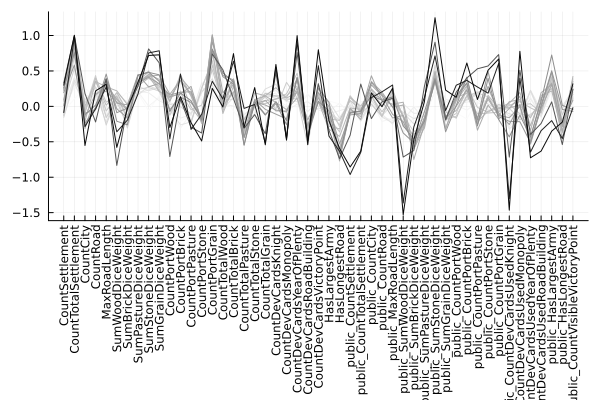

In [39]:
fname(k, t::Symbol) = joinpath(root_dir, "$(k)_model_$t.csv")
public_fname(k, t::Symbol) = joinpath(root_dir, "$(k)_public_model_$t.csv")
plt = plot()
d = Dict()
for k=1:num_epochs
    for t = teams[1:1]
        
        #println("plotting epoch $k / $num_epochs - $t")
        if ~isfile(fname(k,t))
            continue
        end
        weights = CSV.read(fname(k,t), DataFrame)[!,:Weights]
        append!(weights, CSV.read(public_fname(k,t), DataFrame)[!,:Weights])
        d[(k,t)] = weights
        #plot!(weights; color = "Gray$(2*k)")
        c = RGB(repeat([1-(5.7*k/255)],3)...)
        println(k,t,c)
        
        #plot!(weights; color = c)
        plot!(weights, xticks = (1:length(weights), [String(s) for s in weight_labels]), legend=false; xrotation = 90, color = c)
        #plot!(weights)
    end
end
plt


In [38]:
# See which label had the biggest change over time
change = []
team = teams[1]
for (i,label) in enumerate(weight_labels)
    first_val = d[(1, team)][i]
    last_val = d[(num_epochs, team)][i]
    difference = last_val - first_val
    push!(change, (label, difference))
end

top_changes = sort!(change, by=t -> -t[2])
for x in top_changes
    println(x)
end


(:CountDevCardsYearOfPlenty, 0.9590132007021887)
(:public_SumStoneDiceWeight, 0.9302617683652319)
(:CountTotalSettlement, 0.8983336808713493)
(:public_CountDevCardsUsedMonopoly, 0.8368498164595379)
(:CountTotalBrick, 0.8103585758815754)
(:public_CountPortBrick, 0.7882804485840686)
(:SumStoneDiceWeight, 0.7800160605125178)
(:CountDevCardsVictoryPoint, 0.7560817294080503)
(:public_CountPortGrain, 0.5969460864794949)
(:SumGrainDiceWeight, 0.5720697996409769)
(:public_CountPortStone, 0.4683320096377501)
(:CountDevCardsKnight, 0.40522380717851425)
(:public_MaxRoadLength, 0.39244882754245825)
(:CountSettlement, 0.370034142839136)
(:CountPortBrick, 0.350026033573616)
(:CountTotalStone, 0.31412722278748134)
(:MaxRoadLength, 0.2812384162299225)
(:public_CountVisibleVictoryPoint, 0.24136787933074044)
(:public_CountCity, 0.23753368846900724)
(:public_CountPortWood, 0.22195737362354057)
(:SumPastureDiceWeight, 0.15896592981972213)
(:CountPortGrain, 0.1132277648365439)
(:public_SumPastureDiceWeight